# Heart Failure Dataset
www.kaggle.com/fedesoriano/heart-failure-prediction
> **Attribute Information**: <br>
    - Age: age of the patient [years]. <br>
    - Sex: sex of the patient [M: Male, F: Female]. <br>
    - ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]. <br>
    - RestingBP: resting blood pressure [mm Hg]. <br>
    - Cholesterol: serum cholesterol [mm/dl]. <br>
    - FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]. <br>
    - RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]. <br>
    - MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]. <br>
    - ExerciseAngina: exercise-induced angina [Y: Yes, N: No]. <br> 
    - Oldpeak: oldpeak = ST [Numeric value measured in depression]. <br>
    - ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]. <br>
    - HeartDisease: output class [1: heart disease, 0: Normal]. <br>


## Questions:

## Data Wrangling

In [28]:
# import necessary package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder # to encode the label
from sklearn.model_selection import train_test_split # to split my data befor classification model
from sklearn.neighbors import KNeighborsClassifier # for classification
from sklearn.metrics import accuracy_score, mean_absolute_error # calculate the accuracy
from sklearn.linear_model import LinearRegression # for Regression

### Assissing Data

In [3]:
# load the data set into pandas dataframe
heart = pd.read_csv('heart.csv')
heart.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [4]:
heart.tail(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
908,63,M,ASY,140,187,0,LVH,144,Y,4.0,Up,1
909,63,F,ASY,124,197,0,Normal,136,Y,0.0,Flat,1
910,41,M,ATA,120,157,0,Normal,182,N,0.0,Up,0
911,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [5]:
# display basic and necessary information about the datafram
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
# find the NAN values
heart.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
# check the duplicate values
heart.duplicated().sum()

0

In [8]:
# show the number of values in "ChestPainType", "RestingECG", "ExerciseAngina" and "ST_Slope" columns
heart.ChestPainType.value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [9]:
heart.RestingECG.value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [10]:
heart.ExerciseAngina.value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [11]:
heart.ST_Slope.value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [12]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


**Observations**:
- The label isn't in good format. So, I will covert it to lower case and add underscore between the words.
- There is NO missing values.
- Data type of all columns are right.
- NO duplicate values.


### cleaning data

In [13]:
# convert label (columns name) to lowercase
heart.rename(columns=str.lower, inplace = True)
heart.columns

Index(['age', 'sex', 'chestpaintype', 'restingbp', 'cholesterol', 'fastingbs',
       'restingecg', 'maxhr', 'exerciseangina', 'oldpeak', 'st_slope',
       'heartdisease'],
      dtype='object')

In [14]:
# reformat the label
heart.rename(columns={'chestpaintype': 'chest_pain_type',
                     'restingbp': 'resting_BP',
                     'fastingbs': 'fasting_BS',
                     'restingecg': 'resting_ECG',
                     'maxhr': 'max_HR',
                     'exerciseangina': 'exercise_angina',
                     'oldpeak': 'old_peak',
                     'st_slope': 'ST_slope',
                     'heartdisease': 'heart_disease'}, inplace = True)
heart.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_BP', 'cholesterol',
       'fasting_BS', 'resting_ECG', 'max_HR', 'exercise_angina', 'old_peak',
       'ST_slope', 'heart_disease'],
      dtype='object')

### Encoding

In [15]:
# encoding the value of "exercise_angina" column to 1 (for Y(yes)) and 0 (for N(no))
heart.exercise_angina = heart.exercise_angina.map({'N': 0, 'Y': 1})
heart.exercise_angina.value_counts()

0    547
1    371
Name: exercise_angina, dtype: int64

In [16]:
# encoding the value of "sex" column to 1 (for F(female)) and 0 (for M(male))
heart.sex = heart.sex.map({'M': 0, 'F': 1})
heart.sex.value_counts()

0    725
1    193
Name: sex, dtype: int64

In [17]:
# endcoding values of "chest_pain_type", "resting_ECG"and "ST_slope" columuns
label_encoder = LabelEncoder()
heart.chest_pain_type = label_encoder.fit_transform(heart.chest_pain_type)
heart.resting_ECG = label_encoder.fit_transform(heart.resting_ECG)
heart.ST_slope = label_encoder.fit_transform(heart.ST_slope)
heart

,age,sex,chest_pain_type,resting_BP,cholesterol,fasting_BS,resting_ECG,max_HR,exercise_angina,old_peak,ST_slope,heart_disease
0,40,0,1,140,289,0,1,172,0,0.0,2,0
1,49,1,2,160,180,0,1,156,0,1.0,1,1
2,37,0,1,130,283,0,2,98,0,0.0,2,0
3,48,1,0,138,214,0,1,108,1,1.5,1,1
4,54,0,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264,0,1,132,0,1.2,1,1
914,68,0,0,144,193,1,1,141,0,3.4,1,1
915,57,0,0,130,131,0,1,115,1,1.2,1,1
916,57,1,1,130,236,0,0,174,0,0.0,1,1


### Classification

In [18]:
# create x and y values
x = heart.drop('heart_disease', axis = True)
y = heart.heart_disease

In [19]:
# use KNeighbrosClassifier to obtain prediction
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
k_n_c = KNeighborsClassifier(n_neighbors = 3)
k_n_c.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
# display the accurate
y_predict = k_n_c.predict(x_test)
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy of KNeighborsClassifier = {accuracy}")

Accuracy of KNeighborsClassifier = 0.6347826086956522


### Regression

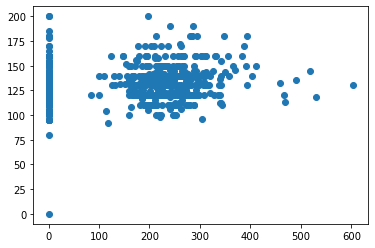

In [50]:
# select training data
x = heart.loc[:600, ['cholesterol']]
y = heart.loc[:600, ['resting_BP']]
plt.scatter(x, y);

In [51]:
# select test data
x_test = heart.loc[601: , ['cholesterol']]
y_test = heart.loc[601: , ['resting_BP']]

In [52]:
# create regression model
regression_model = LinearRegression()
regression_model.fit(x, y)

LinearRegression()

In [55]:
# calculate the absolute error
y_predict = regression_model.predict(x_test)
mean_absolute_error(y_test, y_predict)

13.858783215588282

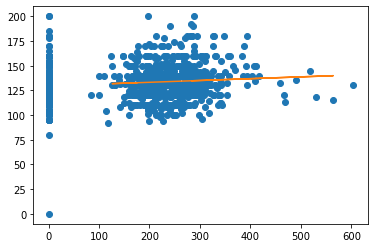

In [59]:
# display the regression figure
plt.scatter(heart.cholesterol, heart.resting_BP)
plt.plot(x_test, y_predict, color = sb.color_palette()[1]);

In [64]:
# y = a + bx
regression_model.intercept_

array([129.49800798])

In [65]:
regression_model.coef_

array([[0.01834439]])